In [141]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

In [142]:
FILENAME = "../data/KarateClub.csv"

In [143]:
graph = nx.Graph()

with open(FILENAME) as fd:
    for line in fd:
        el = map(int, line.split(";"))
        graph.add_edge(*el)

In [144]:
clusters = nx.clustering(graph)
pd_clusters = pd.DataFrame(clusters.items(), columns=["ID", "CC"])
pd_clusters

,ID,CC
0,2,0.333333
1,1,0.150000
2,3,0.244444
3,4,0.666667
4,5,0.666667
5,6,0.500000
6,7,0.500000
7,8,1.000000
8,9,0.500000
9,10,0.000000


In [145]:
nx.average_clustering(graph)

0.5706384782076823

In [146]:
stupne_vrcholu = dict(graph.degree())
stupne_vrcholu = pd.DataFrame(stupne_vrcholu.items(), columns=["ID", "stupen"])
stupne_vrcholu

,ID,stupen
0,2,9
1,1,16
2,3,10
3,4,6
4,5,3
5,6,4
6,7,4
7,8,4
8,9,5
9,10,2


In [147]:
merge = pd.merge(pd_clusters, stupne_vrcholu)
sums = merge.groupby("stupen")["CC"].mean().reset_index(name="CC_avg")
sums.rename(columns={"stupen": "d"}, inplace=True)
sums

,d,CC_avg
0,1,0.000000
1,2,0.909091
2,3,0.444444
3,4,0.555556
4,5,0.500000
5,6,0.433333
6,9,0.333333
7,10,0.244444
8,12,0.196970
9,16,0.150000


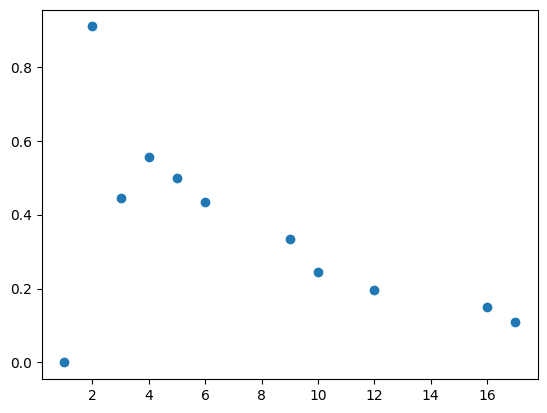

In [148]:
plt.plot(sums["d"], sums["CC_avg"], "o")

In [149]:
distances = nx.floyd_warshall(graph)
n = len(distances)
closeness = np.zeros((n,), dtype=np.float64)
for i in distances:
    sum = 0
    for j in distances:
        sum += distances[i][j]
    closeness[i - 1] = n / sum

closeness = pd.DataFrame(
    [
        (
            i + 1,
            el,
        )
        for i, el in enumerate(closeness)
    ],
    columns=["ID", "closeness"],
)
closeness

,ID,closeness
0,1,0.586207
1,2,0.500000
2,3,0.576271
3,4,0.478873
4,5,0.390805
5,6,0.395349
6,7,0.395349
7,8,0.453333
8,9,0.531250
9,10,0.447368


In [150]:
out = pd.merge(stupne_vrcholu, pd_clusters).merge(closeness).sort_values("ID")
out

,ID,stupen,CC,closeness
1,1,16,0.150000,0.586207
0,2,9,0.333333,0.500000
2,3,10,0.244444,0.576271
3,4,6,0.666667,0.478873
4,5,3,0.666667,0.390805
5,6,4,0.500000,0.395349
6,7,4,0.500000,0.395349
7,8,4,1.000000,0.453333
8,9,5,0.500000,0.531250
9,10,2,0.000000,0.447368


In [151]:
louvain_communities = nx.community.louvain_communities(graph)
louvain_communities_mapping = [
    (
        node,
        i,
    )
    for i, community in enumerate(louvain_communities)
    for node in community
]

df_louvain_communities = pd.DataFrame(
    louvain_communities_mapping, columns=["ID", "louvain_communities"]
)
out = out.merge(df_louvain_communities, how="left")

louvain_communities

[{1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22},
 {5, 6, 7, 11, 17},
 {24, 25, 26, 28, 29, 32},
 {9, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34}]

In [152]:
def draw_communities(communities: list[set[int]], title: str) -> None:
    unique_communities = len(communities)
    community_colors = plt.cm.rainbow(
        [i / unique_communities for i in range(unique_communities)]
    )

    node_colors = []
    for i, community in enumerate(communities):
        for node in community:
            node_colors.append((node, community_colors[i]))

    node_colors.sort(key=lambda x: x[0])
    nodes = list(map(lambda x: x[0], node_colors))
    colors = list(map(lambda x: x[1], node_colors))

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=colors)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    plt.title(f"{title}. Q = {nx.community.modularity(graph, communities)}")
    plt.show()

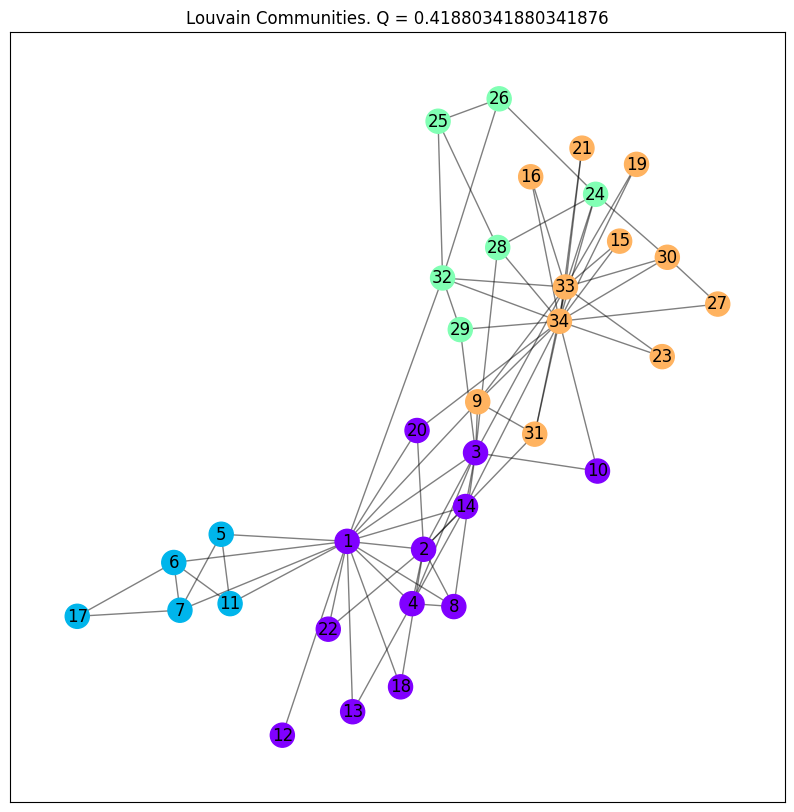

In [153]:
draw_communities(louvain_communities, "Louvain Communities")

In [154]:
label_propagation_communities = list(nx.community.label_propagation_communities(graph))
label_propagation_communities_mapping = [
    (
        node,
        i,
    )
    for i, community in enumerate(label_propagation_communities)
    for node in community
]

df_label_propagation_communities = pd.DataFrame(
    label_propagation_communities_mapping,
    columns=["ID", "label_propagation_communities"],
)
out = out.merge(df_label_propagation_communities, how="left")

label_propagation_communities

[{1, 2, 4, 5, 8, 11, 12, 13, 14, 18, 20, 22},
 {3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34},
 {6, 7, 17}]

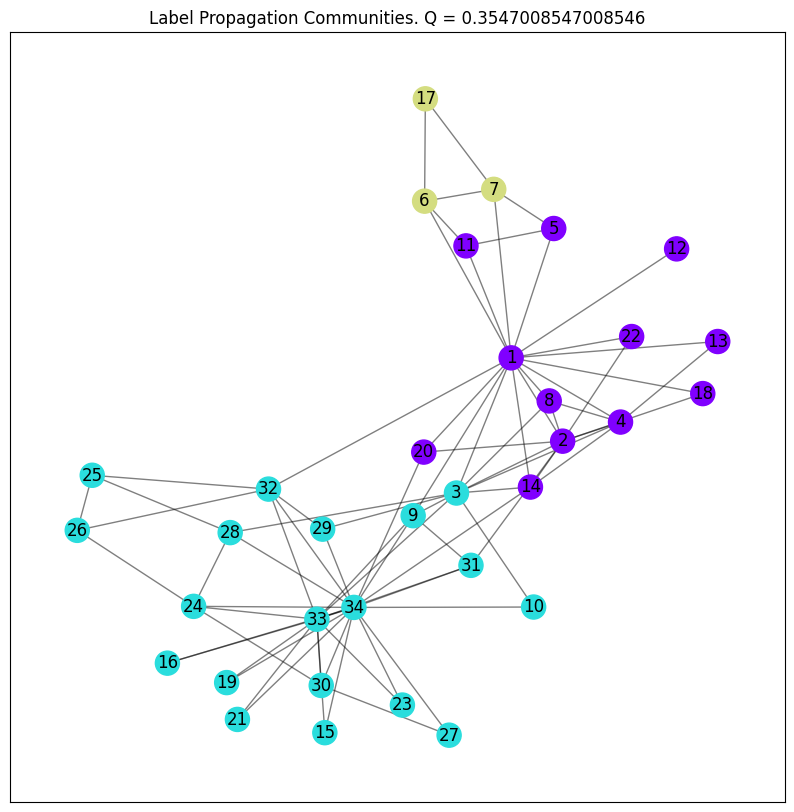

In [155]:
draw_communities(label_propagation_communities, "Label Propagation Communities")

In [156]:
set1, set2 = nx.community.kernighan_lin_bisection(graph)

kernighan_lin_bisection1 = nx.community.kernighan_lin_bisection(graph.subgraph(set1))
kernighan_lin_bisection2 = nx.community.kernighan_lin_bisection(graph.subgraph(set2))
kernighan_lin_bisection = (*kernighan_lin_bisection1, *kernighan_lin_bisection2)

kernighan_lin_bisection_mapping = [
    (
        node,
        i,
    )
    for i, community in enumerate(kernighan_lin_bisection)
    for node in community
]

df_louvain_communities = pd.DataFrame(
    kernighan_lin_bisection_mapping, columns=["ID", "kernighan_lin_bisection"]
)
out = out.merge(df_louvain_communities, how="left")

kernighan_lin_bisection

({5, 6, 7, 10, 11, 12, 17, 22},
 {1, 2, 3, 4, 8, 13, 14, 18, 20},
 {15, 23, 24, 25, 26, 28, 29, 32},
 {9, 16, 19, 21, 27, 30, 31, 33, 34})

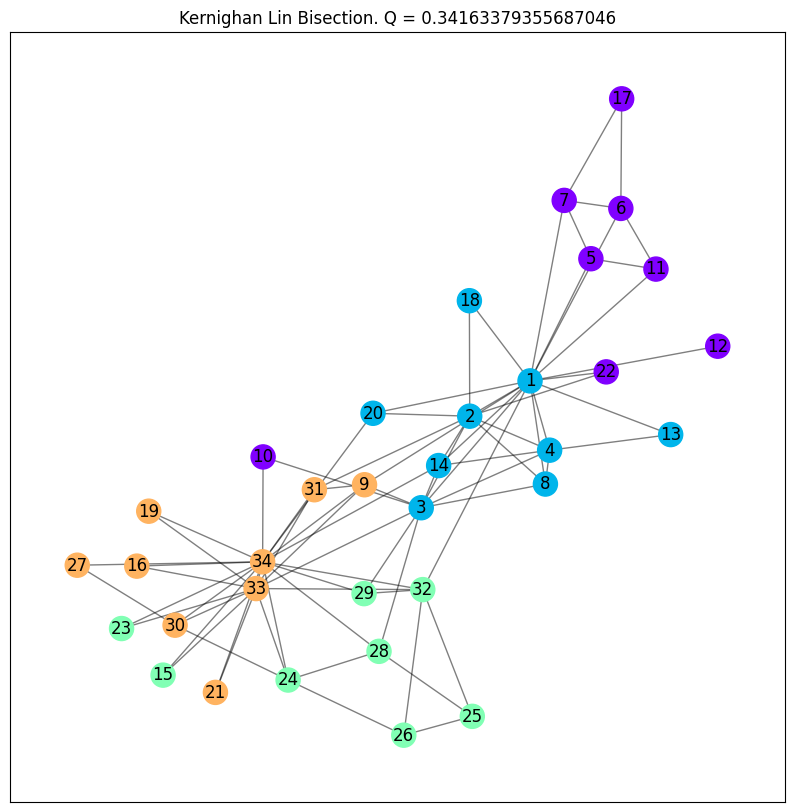

In [157]:
draw_communities(kernighan_lin_bisection, "Kernighan Lin Bisection")

In [158]:
girvan_newman: list[tuple[int]]

for girvan_newman in nx.community.girvan_newman(graph):
    if len(girvan_newman) == 4:
        break

girvan_newman_mapping = [
    (
        node,
        i,
    )
    for i, community in enumerate(girvan_newman)
    for node in community
]

df_louvain_communities = pd.DataFrame(
    girvan_newman_mapping, columns=["ID", "girvan_newman"]
)
out = out.merge(df_louvain_communities, how="left")

girvan_newman

({1, 2, 4, 8, 12, 13, 14, 18, 20, 22},
 {3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34},
 {5, 6, 7, 11, 17},
 {10})

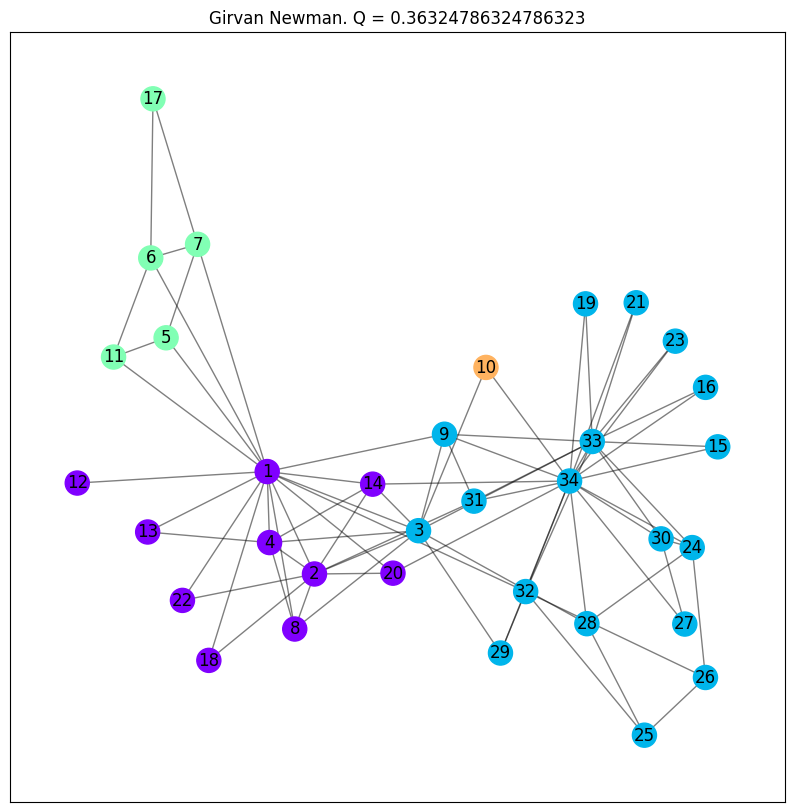

In [159]:
draw_communities(girvan_newman, "Girvan Newman")

In [160]:
k_clique_communities = list(nx.community.k_clique_communities(graph, 4))

k_clique_communities_mapping = [(node, []) for node in range(1, 35)]
k_clique_communities_mapping.sort(key=lambda x: x[0])

for i, community in enumerate(k_clique_communities):
    for node in community:
        k_clique_communities_mapping[node - 1][1].append(i)

df_k_clique_communities = pd.DataFrame(
    k_clique_communities_mapping, columns=["ID", "k_clique_communities"]
)
out = out.merge(df_k_clique_communities, how="left")

k_clique_communities

[frozenset({1, 2, 3, 4, 8, 14}),
 frozenset({9, 31, 33, 34}),
 frozenset({24, 30, 33, 34})]

In [161]:
out

,ID,stupen,CC,closeness,louvain_communities,label_propagation_communities,kernighan_lin_bisection,girvan_newman,k_clique_communities
0,1,16,0.150000,0.586207,0,0,1,0,[0]
1,2,9,0.333333,0.500000,0,0,1,0,[0]
2,3,10,0.244444,0.576271,0,1,1,1,[0]
3,4,6,0.666667,0.478873,0,0,1,0,[0]
4,5,3,0.666667,0.390805,1,0,0,2,[]
5,6,4,0.500000,0.395349,1,2,0,2,[]
6,7,4,0.500000,0.395349,1,2,0,2,[]
7,8,4,1.000000,0.453333,0,0,1,0,[0]
8,9,5,0.500000,0.531250,3,1,3,1,[1]
9,10,2,0.000000,0.447368,0,1,0,3,[]


In [163]:
out.to_csv("out.csv", index=False)